In [1]:
import datetime
import fnmatch
import matplotlib.cbook
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import numpy as np
import os
import glob
import pandas as pd
import pickle
import platform
from pylab import rcParams
import scipy
from scipy import stats
import warnings


warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
startTimeNotebook = datetime.datetime.now()
if 'COLAB_GPU' in os.environ:
    !git clone https://github.com/HeathenToaster/code
    %cd code

# session lists in a .py file
# import sessionlists
%run sessionlists
from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/test.mplstyle')

In [2]:
#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/ALLDATA"
    savePath="/home/david/Desktop/Save"
elif platform.system()=='Darwin':
    root="/Users/tom/Desktop/sequencesALLDATA"
    savePath="/Users/tom/Desktop/Save"
if 'COLAB_GPU' in os.environ:
    !gdown --id 1BSepSzm1-KQJlUvv8C23p_qyHvtzvrZ8
    !unzip -qq /content/code/sequencesALLDATA.zip
    root="/content/code/sequencesALLDATA"
    savePath="/content/Save"
    print("I'm running on Colab")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)
print("Save Path: ", savePath)

print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/david/Desktop/ALLDATA
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save
Found 19 rats in the data folder


In [37]:
rat_markers = {}
params = {}
nb_runsBin = {}
speedRunToLeftBin, speedRunToRightBin = {}, {}
timeRunToLeftBin, timeRunToRightBin = {}, {}
maxSpeedLeftBin, maxSpeedRightBin = {}, {}
timeStayInLeftBin, timeStayInRightBin = {}, {}
totalDistance, totalWater, total_trials = {}, {}, {}
XtrackRunToLeftBin, XtrackRunToRightBin = {}, {}
instantSpeedLeftBin, instantSpeedRightBin = {}, {}
trackTimeToLeftBin, trackTimeToRightBin = {}, {}
sequence = {}

# define colors for each rat
palette = {'RatF00': (0.4, 0.0, 0.0), 'RatF01': (0.55, 0.13, 0.13), 'RatF02': (0.8, 0.2, 0.2),
           'RatM00': (0.0, 0.4, 0.0), 'RatM01': (0.13, 0.55, 0.13), 'RatM02': (0.2, 0.8, 0.2),
           'RatF20': (0.4, 0.0, 0.0), 'RatF21': (0.55, 0.13, 0.13), 'RatF22': (0.8, 0.2, 0.2),
           'RatM20': (0.0, 0.4, 0.0), 'RatM21': (0.13, 0.55, 0.13), 'RatM22': (0.2, 0.8, 0.2),
           'RatF30': (0.4, 0.0, 0.0), 'RatF31': (0.55, 0.13, 0.13), 'RatF32': (0.8, 0.2, 0.2), 'RatF33': (0.8, 0.2, 0.2),
           'RatM30': (0.0, 0.4, 0.0), 'RatM31': (0.13, 0.55, 0.13), 'RatM32': (0.2, 0.8, 0.2), 
           'RatF30L': (0.4, 0.0, 0.0), 'RatF31L': (0.55, 0.13, 0.13), 'RatF32L': (0.8, 0.2, 0.2), 'RatF33L': (0.8, 0.2, 0.2),
           'RatM30L': (0.0, 0.4, 0.0), 'RatM31L': (0.13, 0.55, 0.13), 'RatM32L': (0.2, 0.8, 0.2)}

# define brain status (lesion/CNO/intact) for each rat, used in plots
# needs to be properly implemented, setting is in behav_params for each session.
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF20': 'thcre', 'RatF21': 'thcre', 'RatF22': 'thcre',
               'RatM20': 'thcre', 'RatM21': 'thcre', 'RatM22': 'thcre',
               'RatF30': 'lesion', 'RatF31': 'lesion', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'lesion', 'RatM31': 'normal', 'RatM32': 'normal',
                'RatF30L': 'lesion', 'RatF31L': 'lesion', 'RatF32L': 'biglesion', 'RatF33L': 'biglesion',
                'RatM30L': 'lesion', 'RatM31L': 'biglesion', 'RatM32L': 'biglesion'
               }

markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}
# define list of rats to be analyzed
# first batch  
# animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02']

# all rats
# animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
# animalList += ['RatF30L', 'RatF31L', 'RatF32L', 'RatF33L', 'RatM30L', 'RatM31L', 'RatM32L']

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 'RatF32', 'RatF33', 'RatM31', 'RatM32']
# THcre RATS
# animalList += ['RatF20', 'RatF21', 'RatF22', 'RatM20', 'RatM21', 'RatM22']

_map = plt.cm.get_cmap('tab20')

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[palette[animal], markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[palette[animal], markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    # loop over all sessions for each rat and get the pickled preprocessed data. Data is processed in VIGOR_Preprocess.py
    # data (list or list of lists) for each variable is stored in a dictionary with keys (animal, session)
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
                                                #  dist60bis+dist90bis+dist120bis)):

        # get the preprocessed data from the pickle file
        # In this notebook we only need the sequence of events, so we only load that
        biglesion = True if 'L' in session else False
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p", biglesion=biglesion)

        params[animal, session]     = get_from_pickle(root, animal[0:6], session, name="params.p", biglesion=biglesion)
        nb_runsBin[animal, session] = get_from_pickle(root, animal[0:6], session, name="nbRuns.p", biglesion=biglesion)
        speedRunToLeftBin[animal, session],  speedRunToRightBin[animal, session]  = get_from_pickle(root, animal[0:6], session, name="avgSpeed.p", biglesion=biglesion)
        maxSpeedLeftBin[animal, session],    maxSpeedRightBin[animal, session]    = get_from_pickle(root, animal[0:6], session, name="maxSpeed.p", biglesion=biglesion)
        timeStayInLeftBin[animal, session],  timeStayInRightBin[animal, session]  = get_from_pickle(root, animal[0:6], session, name="timeinZone.p", biglesion=biglesion)
        timeRunToLeftBin[animal, session],   timeRunToRightBin[animal, session]   = get_from_pickle(root, animal[0:6], session, name="timeRun.p", biglesion=biglesion)
        XtrackRunToLeftBin[animal, session], XtrackRunToRightBin[animal, session] = get_from_pickle(root, animal[0:6], session, name="trackPos.p", biglesion=biglesion)
        instantSpeedLeftBin[animal, session],instantSpeedRightBin[animal, session]= get_from_pickle(root, animal[0:6], session, name="trackSpeed.p", biglesion=biglesion)
        trackTimeToLeftBin[animal, session], trackTimeToRightBin[animal, session] = get_from_pickle(root, animal[0:6], session, name="trackTime.p", biglesion=biglesion)
        totalDistance[animal, session],      totalWater[animal, session], total_trials[animal, session] = get_from_pickle(root, animal[0:6], session, name="misc.p", biglesion=biglesion)


Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32


In [44]:
_map = plt.cm.get_cmap('jet')

for index, animal in enumerate(animalList):

    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[_map(index/len(animalList)), markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[_map(index/len(animalList)), markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32


In [35]:

# plot variable median/mean fir each blockFdodger
def plot_median_per_bin(data, rewardProbaBlock, blocks, barplotaxes, color, stat,
                        xyLabels=[" ", " ", " ", " "], title="", scatter=False, ax=None):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if ax is None:
        ax = plt.gca()
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
        if scatter:
            ax.scatter(np.random.normal(((blocks[i][1] + blocks[i][0])/120), 1, len(data[i])), data[i], s=5, color=color[0])

    if stat == "Avg. ":
        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.mean(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color=color[0])
        # if isinstance(data[0], list):
        #     ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.mean(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=0);

    elif stat == "Med. ":
        ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color=color[0])
        # if isinstance(data[0], list):
        #     ax.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=3);

    ax.set_title(title)
    ax.set_xlabel(xyLabels[0])
    ax.set_ylabel(stat + xyLabels[1])
    ax.set_xlim([barplotaxes[0], barplotaxes[1]])
    ax.set_ylim([barplotaxes[2], barplotaxes[3]])
    return ax


def across_session_plot(plot, animal_list, session_list, dataLeft, dataRight, experiment, params, plot_axes, ticks, titles_plot_xaxis_yaxis, datatype, marker, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title(titles_plot_xaxis_yaxis[0], fontsize=16)
    ax.set_xlabel(titles_plot_xaxis_yaxis[1], fontsize=16)
    ax.set_ylabel(titles_plot_xaxis_yaxis[2], fontsize=16)
    ax.set_xlim(plot_axes[0], plot_axes[1])
    ax.set_ylim(plot_axes[2], plot_axes[3])
    if ticks[0] != []:
        ax.set_xticks(ticks[0])
    if ticks[1] != []:
        ax.set_yticks(ticks[1])
    ax.tick_params(width=1.5, labelsize=12)
    # if experiment == 'TM_ON': ax.tick_params(axis = 'x', rotation = 45)
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.yaxis.set_label_coords(-0.22, 0.5)
    ax.patch.set_facecolor('grey')
    ax.patch.set_alpha(90/250 if plot == "90%" else
                       10/250 if plot == "10%" else
                       0)
    ax.yaxis.label.set_color('cyan' if datatype == 'avgrunspeed' else
                             'dodgerblue' if datatype == 'runningtime' else
                             'orange' if datatype == 'idletime' else
                             'red'if datatype == 'maxspeed' else 'k')

    a, b, c, d, e, f, g, h, i, j, k, l = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    LW = 1
    if experiment == 'Distance':
        data90_60, data90_90, data90_120, data10_60, data10_90, data10_120 = separate_data(animal_list, session_list, dataLeft, dataRight, experiment, params, datatype, False)
        for animal in animal_list:
            if datatype == 'runningtime':
                realdist60, realdist90, realdist120 = ticks[2]
                x = (np.nanmean(realdist60[animal]), np.nanmean(realdist90[animal]), np.nanmean(realdist120[animal]))
                ax.set_xticks([int(np.nanmean([np.nanmean(realdist60[animal]) for animal in animal_list])),
                               int(np.nanmean([np.nanmean(realdist90[animal]) for animal in animal_list])),
                               int(np.nanmean([np.nanmean(realdist120[animal]) for animal in animal_list]))])
                ax.set_xlim(plot_axes[0], plot_axes[1])
            else:
                x = (60, 90, 120)

            if datatype == 'nb_runs':
                a = np.median(data90_60[animal])
                b = np.median(data90_90[animal])
                c = np.median(data90_120[animal])
                d = np.median(data10_60[animal])
                e = np.median(data10_90[animal])
                f = np.median(data10_120[animal])
            else:
                a = np.nanmedian([item for sublist in data90_60[animal] for item in sublist])
                b = np.nanmedian([item for sublist in data90_90[animal] for item in sublist])
                c = np.nanmedian([item for sublist in data90_120[animal] for item in sublist])
                d = np.nanmedian([item for sublist in data10_60[animal] for item in sublist])
                e = np.nanmedian([item for sublist in data10_90[animal] for item in sublist])
                f = np.nanmedian([item for sublist in data10_120[animal] for item in sublist])

            if plot == "90%":
                ax.plot(x, (a, b, c), marker='o', markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
                # ax.errorbar(x, (a, b, c), yerr = (stats.std([item for sublist in data90_60[animal]  for item in sublist]),  stats.std([item for sublist in data90_90[animal]  for item in sublist]), stats.std([item for sublist in data90_120[animal] for item in sublist])), color = marker[animal][0], linestyle=marker[animal][2])
            if plot == "10%":
                ax.plot(x, (d, e, f), marker='o', markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
                # ax.errorbar(x, (d, e, f), yerr = (stats.std([item for sublist in data10_60[animal]  for item in sublist]),  stats.std([item for sublist in data10_90[animal]  for item in sublist]), stats.std([item for sublist in data10_120[animal] for item in sublist])), color = marker[animal][0], linestyle=marker[animal][2])
            if plot == "%":
                ax.plot(x, (d/a, e/b, f/c), marker='o', markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])

    if experiment == 'TM_ON':
        data90_rev20, data90_rev10, data90_rev2, data90_2, data90_10, data90_20, data10_rev20, data10_rev10, data10_rev2, data10_2, data10_10, data10_20 = separate_data(animal_list, session_list, dataLeft, dataRight, experiment, params, datatype, False)
        for animal in animal_list:
            x = (-20, -10, -2, 2, 10, 20)
            if datatype == 'nb_runs':
                a = np.median(data90_rev20[animal])
                b = np.median(data90_rev10[animal])
                c = np.median(data90_rev2[animal])
                d = np.median(data90_2[animal])
                e = np.median(data90_10[animal])
                f = np.median(data90_20[animal])

                g = np.median(data10_rev20[animal])
                h = np.median(data10_rev10[animal])
                i = np.median(data10_rev2[animal])
                j = np.median(data10_2[animal])
                k = np.median(data10_10[animal])
                l = np.median(data10_20[animal])
            else:
                a = np.nanmedian([item for sublist in data90_rev20[animal] for item in sublist])
                b = np.nanmedian([item for sublist in data90_rev10[animal] for item in sublist])
                c = np.nanmedian([item for sublist in data90_rev2[animal] for item in sublist])
                d = np.nanmedian([item for sublist in data90_2[animal] for item in sublist])
                e = np.nanmedian([item for sublist in data90_10[animal] for item in sublist])
                f = np.nanmedian([item for sublist in data90_20[animal] for item in sublist])

                g = np.nanmedian([item for sublist in data10_rev20[animal] for item in sublist])
                h = np.nanmedian([item for sublist in data10_rev10[animal] for item in sublist])
                i = np.nanmedian([item for sublist in data10_rev2[animal] for item in sublist])
                j = np.nanmedian([item for sublist in data10_2[animal] for item in sublist])
                k = np.nanmedian([item for sublist in data10_10[animal] for item in sublist])
                l = np.nanmedian([item for sublist in data10_20[animal] for item in sublist])

            if plot == "90%":
                ax.plot(x, (a, b, c, d, e, f), marker='o', markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
            if plot == "10%":
                ax.plot(x, (g, h, i, j, k, l), marker='o', markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
            if plot == "%":
                ax.plot(x, (g/a, h/b, i/c, j/d, k/e, l/f), marker='o', markersize=6, linestyle=marker[animal][2], linewidth=LW, color=marker[animal][0])
    return ax


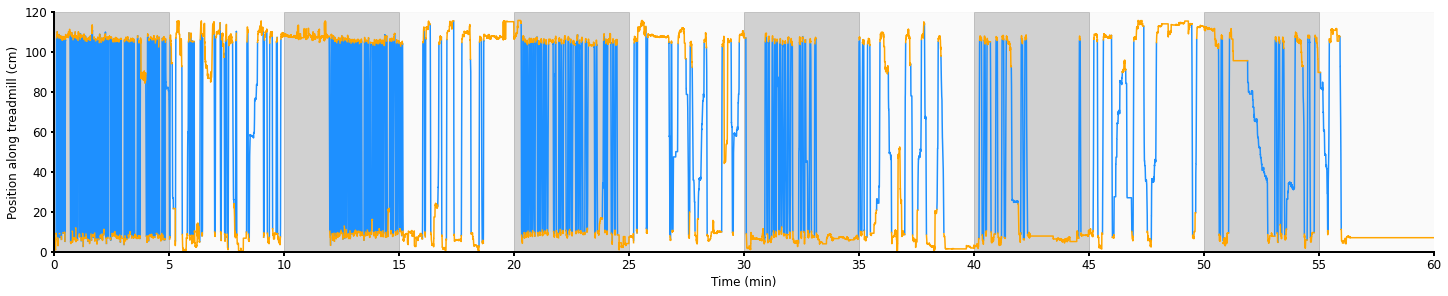

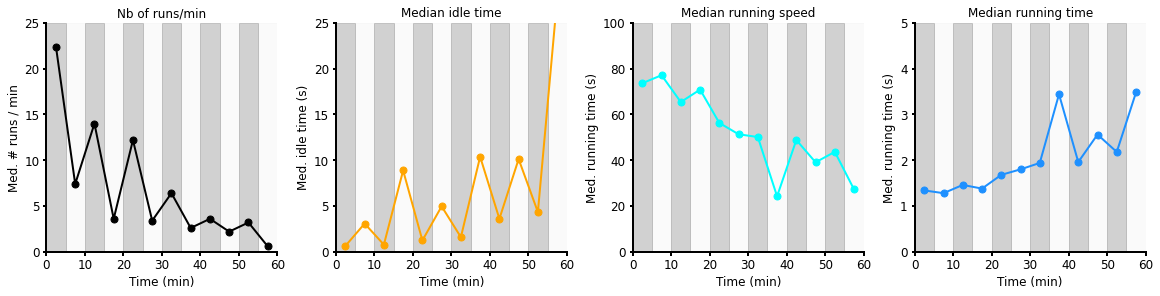

In [17]:

animal, session = 'RatM01', 'RatM01_2021_07_22_17_14_48'  # 'RatF00', 'RatF00_2021_07_24_15_28_05'
animal, session = 'RatF02', 'RatF02_2021_07_22_18_14_16'
example_params = get_from_pickle(root, animal, session, name="params.p")
example_nbRuns = get_from_pickle(root, animal, session, name="nbRuns.p")
example_idleTimeInLeftBin, example_idleTimeInRightBin = get_from_pickle(root, animal, session, name="timeinZone.p")
example_avgspeedToLeftBin, example_avgspeedToRightBin = get_from_pickle(root, animal, session, name="avgSpeed.p")
example_runningTimeInLeftBin, example_runningTimeInRightBin = get_from_pickle(root, animal, session, name="timeRun.p")



fig, axs = plt.subplots(1, figsize = (20, 4))
# plot the trajectory
plot_animal_trajectory(root=root, animal=animal, session=session, params=example_params, barplotaxes=[0, 3600, 0, 120], 
                 xyLabels=["Time (min)", "Position along treadmill (cm)"], title="Position of example animal across a 120 cm session", ax=axs)


scat = False
fig, axs = plt.subplots(1, 4, figsize = (16, 4))
plot_median_per_bin([example_nbRuns[i]/5 for i in range(0, 12)], 
example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes = [0, 3600/60, 0, 25], 
color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min"], title="Nb of runs/min", stat='Med. ', ax=axs[0]);

plot_median_per_bin([example_idleTimeInLeftBin[i]+example_idleTimeInRightBin[i] for i in range(0, 12)], 
                example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes=[0, 3600/60, 0, 25], 
                color=['orange'], xyLabels=["Time (min)","idle time (s)"], title="Median idle time", scatter=scat, stat='Med. ', ax=axs[1]);

# plot the median running time in each time block
plot_median_per_bin([example_avgspeedToLeftBin[i]+example_avgspeedToRightBin[i] for i in range(0, 12)], 
                example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes=[0, 3600/60, 0, 100], 
                color=['cyan'], xyLabels=["Time (min)","running time (s)"], title="Median running speed", scatter=scat, stat='Med. ', ax=axs[2]);

# plot the median running time in each time block
plot_median_per_bin([example_runningTimeInLeftBin[i]+example_runningTimeInRightBin[i] for i in range(0, 12)], 
                example_params['rewardProbaBlock'], example_params['blocks'], barplotaxes=[0, 3600/60, 0., 5], 
                color=['dodgerblue'], xyLabels=["Time (min)","running time (s)"], title="Median running time", scatter=scat, stat='Med. ', ax=axs[3]);

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (13).

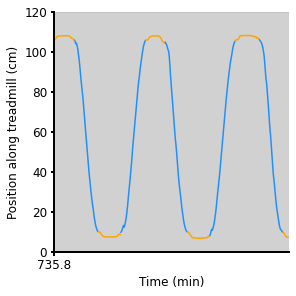

In [29]:
fig, axs = plt.subplots(1, figsize = (4, 4))
# plot the trajectory
plot_animal_trajectory(root=root, animal=animal, session=session, params=example_params, barplotaxes=[735.8, 750, 0, 120], 
                 xyLabels=["Time (min)", "Position along treadmill (cm)"], title="Position of example animal across a 120 cm session", ax=axs)


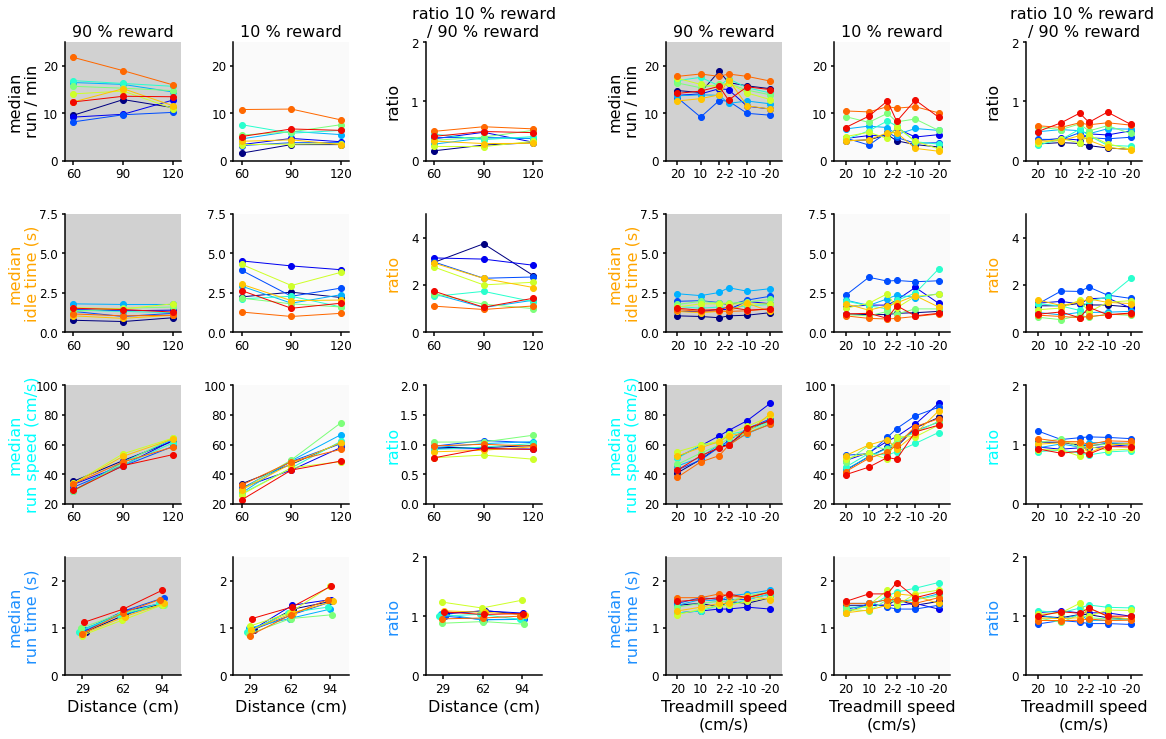

In [45]:
#TAC plots
fig = plt.figure(constrained_layout = False, figsize=(30.5, 13)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 71)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)
col4 = slice(25, 30)
col5 = slice(32, 37)
col6 = slice(40, 45)
col7 = slice (50, 55)
col8 = slice (58, 63)
col9 = slice (66, 71)

# compute true run distance
realdist60 = {}
realdist90 = {}
realdist120= {}

# compute the running distance for each run (pos start - pos end) for each distance configuration
for animal in animalList:
    realdist60[animal], realdist90[animal], realdist120[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            realdist60[animal] = np.append(realdist60[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist60[animal] = np.append(realdist60[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            realdist90[animal] = np.append(realdist90[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist90[animal] = np.append(realdist90[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            realdist120[animal] = np.append(realdist120[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist120[animal] = np.append(realdist120[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])



session_list = dist60+dist90+dist120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'median\nrun / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 7.5], ticks = [[60, 90, 120],[0, 2.5, 5, 7.5]], titles_plot_xaxis_yaxis = ['', '', 'median\nidle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 7.5], ticks = [[60, 90, 120],[0, 2.5, 5, 7.5]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'median\nrun speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 2.5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'median\nrun time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 2.5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 2], ticks = [[60, 90, 120],[0, 1, 2], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'ratio'], datatype = 'runningtime', marker=rat_markers)



session_list = TM20+TM10+TM2+TMrev2+TMrev10+TMrev20
experiment = 'TM_ON'

ax00 = fig.add_subplot(gs[row1, col4])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'median\nrun / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col5])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col6])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward \n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col4])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 7.5], ticks = [[-20, -10, -2, 2, 10, 20],[0, 2.5, 5, 7.5]], titles_plot_xaxis_yaxis = ['', '', 'median\nidle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col5])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 7.5], ticks = [[-20, -10, -2, 2, 10, 20],[0, 2.5, 5, 7.5]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col6])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 5], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col4])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'median\nrun speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col5])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col6])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col4])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2.5], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'median\nrun time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col5])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2.5], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col6])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'ratio'], datatype = 'runningtime', marker=rat_markers)


# save_plot_as_png('maineffect2021', dpi = 300, transparent = False, background = 'w') #change to 300 dpi for clean printfigs